<a href="https://colab.research.google.com/github/kridtapon/Rebalancing-Top-5-S-P-500-Stock-Each-Year/blob/main/Rebalancing_Top_5_S%26P_500_Stock_Each_Year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf


# Fetch the S&P 500 ticker list from Wikipedia
wiki_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500_table = pd.read_html(wiki_url)
sp500_df = sp500_table[0]  # Get the first table on the page
sp500_tickers = sp500_df['Symbol'].tolist()

# Clean the tickers (remove any invalid ones)
sp500_tickers = [ticker.replace('.', '-') for ticker in sp500_tickers]

In [ ]:
sp500_tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMTM',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf


# Fetch the S&P 500 ticker list from Wikipedia
wiki_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500_table = pd.read_html(wiki_url)
sp500_df = sp500_table[0]  # Get the first table on the page
sp500_tickers = sp500_df['Symbol'].tolist()

# Clean the tickers (remove any invalid ones)
sp500_tickers = [ticker.replace('.', '-') for ticker in sp500_tickers]

# Download adjusted closing prices from Yahoo Finance
start_date = '1999-01-01'
end_date = '2024-01-01'

stock_data = yf.download(sp500_tickers, start=start_date, end=end_date)['Adj Close']

# Calculate annual returns for each stock
annual_returns = stock_data.resample('Y').ffill().pct_change()

# Rank stocks based on annual returns each year
ranked_stocks = annual_returns.rank(axis=1, ascending=False)

# Select top 5% of stocks each year
top_5_percent_stocks = ranked_stocks <= ranked_stocks.shape[1] * 0.05

# Get the tickers for the top 30% of stocks each year
top_5_percent_tickers = top_5_percent_stocks.apply(lambda x: list(stock_data.columns[x]), axis=1)

top_5_percent_tickers

[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['SOLV', 'AMTM', 'GEV', 'SW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 1999-01-01 -> 2024-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 915166800, endDate = 1704085200")')
<ipython-input-120-32c55e095fe4>:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_returns = stock_data.resample('Y').ffill().pct_change()
<ipython-input-120-32c55e095fe4>:22: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  annual_returns = stock_data.resample('Y').ffill().pct_change()


,0
Date,
1999-12-31,[]
2000-12-31,"[BLK, CAH, CB, COR, DGX, DVA, EG, EOG, EXC, HS..."
2001-12-31,"[ACGL, ANSS, AZO, BBY, BKNG, BSX, CPRT, EBAY, ..."
2002-12-31,"[AMZN, AOS, BALL, BSX, CNC, CTSH, ELV, FCX, FR..."
2003-12-31,"[AES, AKAM, ALGN, AMD, AMT, AMZN, AXON, CCI, C..."
2004-12-31,"[AAPL, ADSK, AMT, AXON, BG, BIIB, CME, CMI, CN..."
2005-12-31,"[AAPL, CBRE, CCI, CME, CRM, DLR, DVN, EOG, GLW..."
2006-12-31,"[AKAM, ALB, ALGN, BKNG, BXP, CBRE, CF, CMCSA, ..."
2007-12-31,"[AAPL, AMZN, ANSS, AXON, BKNG, CF, CMG, CMI, C..."


In [ ]:
import matplotlib.pyplot as plt

# Initialize portfolio equity and loop through each year
portfolio_equity = [1]  # Start portfolio value
years = top_5_percent_tickers.index.year

for year in range(2003, 2024):  # Loop from 2003 to 2023
      # Get the tickers for the top 5% stocks for the current year
      selected_tickers = top_5_percent_tickers.loc[f'{year}-12-31']

      # Get the returns for the next year
      next_year_data = stock_data[selected_tickers].loc[f'{year + 1}-01-01':f'{year + 1}-12-31']

      # Calculate the annual return for each selected stock
      next_year_return = next_year_data.pct_change().mean(axis=1).fillna(0)  # Average return for the portfolio

      # Compute portfolio performance over the year
      cumulative_return = (1 + next_year_return).prod()  # Compounding returns
      portfolio_equity.append(portfolio_equity[-1] * cumulative_return)  # Update portfolio value

      print(f"Year: {year}, Cumulative Return: {cumulative_return}")
      print(f"Year: {year}, selected_tickers: {selected_tickers}")
      print(f"Year: {year}, next_year_data: {next_year_data}")

Year: 2003, Cumulative Return: 1.4255091182001687
Year: 2003, selected_tickers: ['AES', 'AKAM', 'ALGN', 'AMD', 'AMT', 'AMZN', 'AXON', 'CCI', 'CSGP', 'DECK', 'DHI', 'EQIX', 'FCX', 'FFIV', 'GLW', 'HUM', 'JNPR', 'LRCX', 'NFLX', 'ON', 'SBAC', 'TPR', 'TRMB', 'TYL', 'WMB']
Year: 2003, next_year_data: Ticker           AES   AKAM       ALGN        AMD        AMT    AMZN  \
Date                                                                   
2004-01-02  6.498096  10.78  16.690001  14.860000   8.376281  2.5950   
2004-01-05  6.628333  11.01  17.590000  15.200000   8.574805  2.6635   
2004-01-06  6.669458  11.98  18.180000  15.610000   8.765696  2.6515   
2004-01-07  6.888803  12.69  18.700001  15.660000   8.918410  2.5950   
2004-01-08  6.840822  13.00  18.680000  15.930000   9.819408  2.5120   
...              ...    ...        ...        ...        ...     ...   
2004-12-27  9.116527  12.93  10.830000  21.900000  13.683039  2.1125   
2004-12-28  9.212489  12.93  11.070000  21.730000  13.62

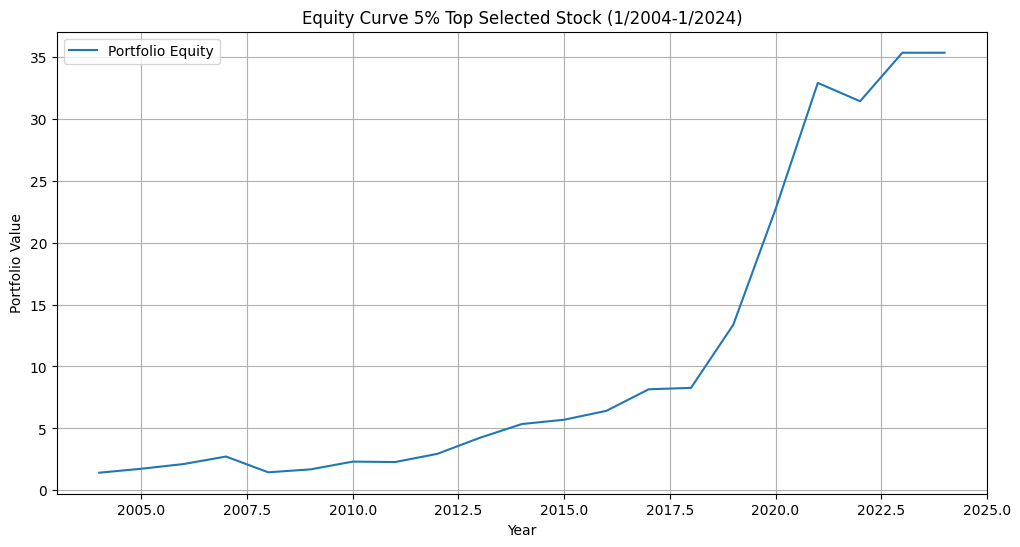

In [ ]:
# Create a DataFrame to store the portfolio equity
portfolio_df = pd.DataFrame({'Year': range(2004, 2025), 'Portfolio Equity': portfolio_equity[1:]})

# Plot the equity curve
plt.figure(figsize=(12, 6))
plt.plot(portfolio_df['Year'], portfolio_df['Portfolio Equity'], label='Portfolio Equity')
plt.title('Equity Curve 5% Top Selected Stock (1/2004-1/2024)')
plt.xlabel('Year')
plt.ylabel('Portfolio Value')
plt.grid()
plt.legend()
plt.show()

[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['GEV', 'SOLV', 'AMTM', 'SW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2003-01-01 -> 2024-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1041397200, endDate = 1704085200")')
<ipython-input-2-a6f00fdd6dc8>:28: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  next_year_return = next_year_data.pct_change().mean(axis=1).fillna(0)  # Average return for the portfolio
<ipython-input-2-a6f00fdd6dc8>:28: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not

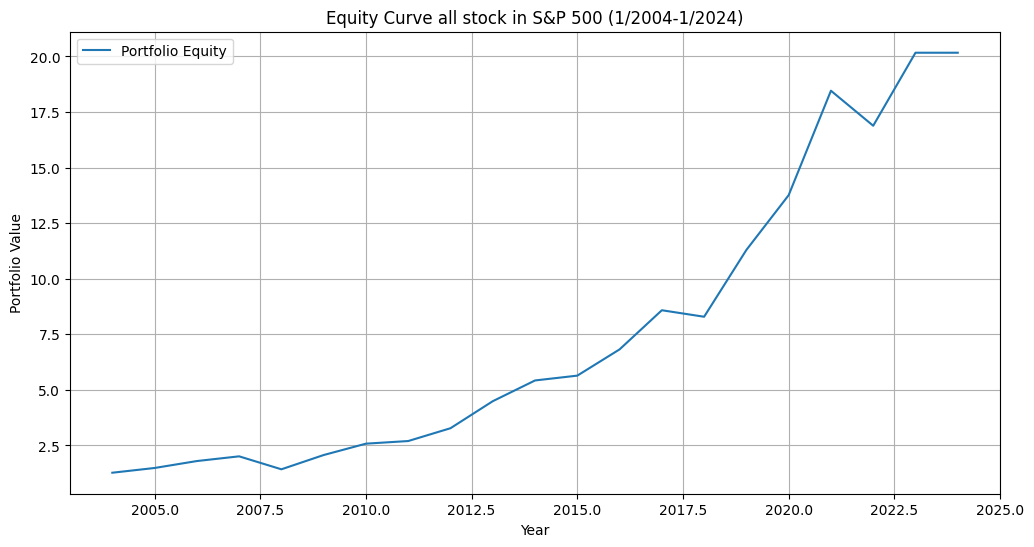

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

# Fetch the S&P 500 ticker list from Wikipedia
wiki_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500_table = pd.read_html(wiki_url)
sp500_df = sp500_table[0]  # Get the first table on the page
sp500_tickers = sp500_df['Symbol'].tolist()

# Clean the tickers (remove any invalid ones)
sp500_tickers = [ticker.replace('.', '-') for ticker in sp500_tickers]

# Download historical stock data from Yahoo Finance for the S&P 500 tickers
start_date = '2003-01-01'
end_date = '2024-01-01'
stock_data = yf.download(sp500_tickers, start=start_date, end=end_date)['Adj Close']

# Initialize portfolio equity and loop through each year
portfolio_equity = [1]  # Start portfolio value

for year in range(2003, 2024):  # Loop from 2003 to 2023
    # Get the returns for the next year for all S&P 500 tickers
    next_year_data = stock_data.loc[f'{year + 1}-01-01':f'{year + 1}-12-31']

    # Calculate the annual return for each selected stock
    next_year_return = next_year_data.pct_change().mean(axis=1).fillna(0)  # Average return for the portfolio

    # Compute portfolio performance over the year
    cumulative_return = (1 + next_year_return).prod()  # Compounding returns
    portfolio_equity.append(portfolio_equity[-1] * cumulative_return)  # Update portfolio value

# Create a DataFrame to store the portfolio equity
portfolio_df = pd.DataFrame({'Year': range(2004, 2025), 'Portfolio Equity': portfolio_equity[1:]})

# Plot the equity curve
plt.figure(figsize=(12, 6))
plt.plot(portfolio_df['Year'], portfolio_df['Portfolio Equity'], label='Portfolio Equity')
plt.title('Equity Curve all stock in S&P 500 (1/2004-1/2024)')
plt.xlabel('Year')
plt.ylabel('Portfolio Value')
plt.grid()
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-3f30dff6000a>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_returns = sp500_index_returns.resample('Y').ffill().pct_change()


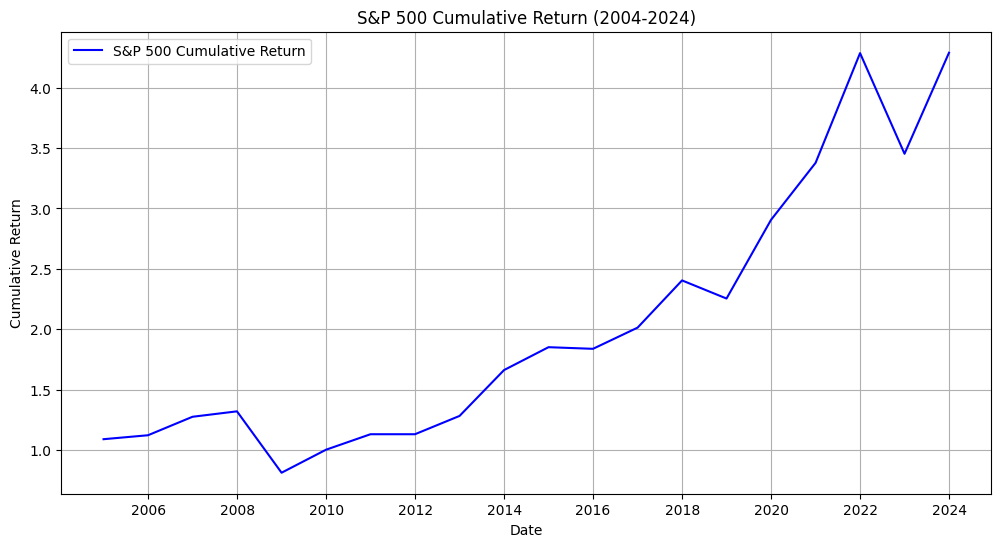

In [1]:
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch the S&P 500 index data (^SPX) from Yahoo Finance
sp500_index_data = yf.download('^SPX', start='2003-01-01', end='2024-01-01')

# Calculate the daily returns for the S&P 500 index
sp500_index_returns = sp500_index_data['Adj Close']

# Calculate annual returns for each stock
annual_returns = sp500_index_returns.resample('Y').ffill().pct_change()

# Calculate the cumulative return for the S&P 500 index
cumulative_sp500_return = (1 + annual_returns).cumprod()

# Plot the cumulative return of the S&P 500 index
plt.figure(figsize=(12, 6))
plt.plot(annual_returns.index, cumulative_sp500_return, label='S&P 500 Cumulative Return', color='blue')
plt.title('S&P 500 Cumulative Return (2004-2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.show()
